# Homework 1 - Part B

## Import "Volve production data.xlsx", sheet "Daily Production Data" as DataFrame  "data". 

## After importing dataset, select only the following 9 columns out of all the columns in that dataframe
["DATEPRD","NPD_WELL_BORE_NAME","ON_STREAM_HRS","AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL","FLOW_KIND"] 

## Following lecture 4 practice example, perform Exploratory Data Analysis (EDA) and comment on your findings.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt # plots
import seaborn as sns ## generates enhanced plots
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('Volve production data(2).xlsx',sheet_name='Daily Production Data')
df = df[["DATEPRD","NPD_WELL_BORE_NAME","ON_STREAM_HRS","AVG_DOWNHOLE_PRESSURE","AVG_DOWNHOLE_TEMPERATURE","BORE_OIL_VOL","BORE_GAS_VOL","BORE_WAT_VOL","FLOW_KIND"]]

In [32]:
df.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
0,2014-04-07,15/9-F-1 C,0.0,0.00000,0.00000,0.0,0.0,0.0,production
1,2014-04-08,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,0.0,production
2,2014-04-09,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,0.0,production
3,2014-04-10,15/9-F-1 C,0.0,NaN,NaN,0.0,0.0,0.0,production
4,2014-04-11,15/9-F-1 C,0.0,310.37614,96.87589,0.0,0.0,0.0,production


In [4]:
df.shape

(15634, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   15634 non-null  datetime64[ns]
 1   NPD_WELL_BORE_NAME        15634 non-null  object        
 2   ON_STREAM_HRS             15349 non-null  float64       
 3   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64       
 5   BORE_OIL_VOL              9161 non-null   float64       
 6   BORE_GAS_VOL              9161 non-null   float64       
 7   BORE_WAT_VOL              9161 non-null   float64       
 8   FLOW_KIND                 15634 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.describe()

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,15349.000000,8980.000000,8980.000000,9161.000000,9161.000000,9161.000000
mean,19.994093,181.803869,77.162969,1095.631548,161049.059703,1672.151332
std,8.369978,109.712363,45.657948,1323.538151,188136.410434,1706.982853
min,0.000000,0.000000,0.000000,0.000000,0.000000,-457.840000
25%,24.000000,0.000000,0.000000,190.690000,29430.590000,19.870000
50%,24.000000,232.896939,103.186689,557.550000,87749.660000,1097.790000
75%,24.000000,255.401455,106.276591,1345.200000,202482.300000,3260.950000
max,25.000000,397.588550,108.502178,5901.840000,851131.520000,8019.740000


## Using well 15/9-F-11 as Case Study
<pr> answer the following questions<pr>

## How many columns with missing data ?

In [11]:
#filtering NPD_WELL_BORE_NAME = '15/9-F-11'
df_well = df[df.NPD_WELL_BORE_NAME == '15/9-F-11']
df_well.head()

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
746,2013-07-08,15/9-F-11,0.0,0.0,0.0,0.0,0.0,0.0,production
747,2013-07-09,15/9-F-11,0.0,0.0,0.0,0.0,0.0,0.0,production
748,2013-07-10,15/9-F-11,0.0,NaN,NaN,0.0,0.0,0.0,production
749,2013-07-11,15/9-F-11,0.0,0.0,0.0,0.0,0.0,0.0,production
750,2013-07-12,15/9-F-11,0.0,NaN,NaN,0.0,0.0,0.0,production


In [24]:
#columns with missing data
df_well.isna().any(axis=0)

DATEPRD                     False
NPD_WELL_BORE_NAME          False
ON_STREAM_HRS               False
AVG_DOWNHOLE_PRESSURE        True
AVG_DOWNHOLE_TEMPERATURE     True
BORE_OIL_VOL                False
BORE_GAS_VOL                False
BORE_WAT_VOL                False
FLOW_KIND                   False
dtype: bool

## How many rows with missing data ?

In [25]:
df_well[df_well.isna().any(axis=1)]

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
748,2013-07-10,15/9-F-11,0.0,NaN,NaN,0.00,0.00,0.0,production
750,2013-07-12,15/9-F-11,0.0,NaN,NaN,0.00,0.00,0.0,production
761,2013-07-23,15/9-F-11,0.0,NaN,NaN,0.00,0.00,0.0,production
764,2013-07-26,15/9-F-11,24.0,NaN,NaN,891.48,131386.55,0.0,production
765,2013-07-27,15/9-F-11,24.0,NaN,NaN,886.42,134616.72,0.0,production
768,2013-07-30,15/9-F-11,24.0,NaN,NaN,1032.38,155864.67,0.0,production


## What is the last non-NAN data in well 15/9-F-11?

In [33]:
df_well[(df_well.NPD_WELL_BORE_NAME == '15/9-F-11')&(~np.isnan(df.BORE_OIL_VOL))][-1:]

,DATEPRD,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,FLOW_KIND
1910,2016-09-17,15/9-F-11,8.27514,253.546058,105.279492,180.04,32165.98,896.59,production


## How many datapoints in Well 15/9-F-11 were involved with production and injection ?

In [34]:
df_well[df_well.NPD_WELL_BORE_NAME == '15/9-F-11'].FLOW_KIND.unique()

array(['production'], dtype=object)

In [35]:
# datapoints in Well 15/9-F-11 were involved with production
production_datapoints=df_well[(df_well.NPD_WELL_BORE_NAME == '15/9-F-11') & (df.FLOW_KIND == "production")].shape[0]

In [36]:
# datapoints in Well 15/9-F-11 were involved with injection
injection_datapoints=df_well[(df_well.NPD_WELL_BORE_NAME == '15/9-F-11') & (df.FLOW_KIND == "injection")].shape[0]

In [37]:
print('Total production datapoints',production_datapoints)

Total production datapoints 1165


In [38]:
print('Total injection datapoints',injection_datapoints)

Total injection datapoints 0


## Using your best judgment, deal with the empty rows/columns if any.

In [42]:
df_well_drop_na=df_well.dropna()

In [43]:
df_well_drop_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1159 entries, 746 to 1910
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   DATEPRD                   1159 non-null   datetime64[ns]
 1   NPD_WELL_BORE_NAME        1159 non-null   object        
 2   ON_STREAM_HRS             1159 non-null   float64       
 3   AVG_DOWNHOLE_PRESSURE     1159 non-null   float64       
 4   AVG_DOWNHOLE_TEMPERATURE  1159 non-null   float64       
 5   BORE_OIL_VOL              1159 non-null   float64       
 6   BORE_GAS_VOL              1159 non-null   float64       
 7   BORE_WAT_VOL              1159 non-null   float64       
 8   FLOW_KIND                 1159 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 90.5+ KB


## How many years of this well has been operating ?

In [53]:
df_well_drop_na["DATEPRD"] = pd.to_datetime(df_well_drop_na.DATEPRD, format='%Y')

In [54]:
df_well_drop_na.DATEPRD.dt.year.unique()

array([2013, 2014, 2015, 2016], dtype=int64)

## What is the Cumulative Production Per Year ? plot it.

In [55]:
df_well_drop_na['Year']=df_well_drop_na.DATEPRD.dt.year

In [56]:
df_well_drop_na[["BORE_OIL_VOL","Year"]].groupby(["Year"]).sum()

,BORE_OIL_VOL
Year,
2013,153290.55
2014,362223.03
2015,465817.60
2016,163707.64


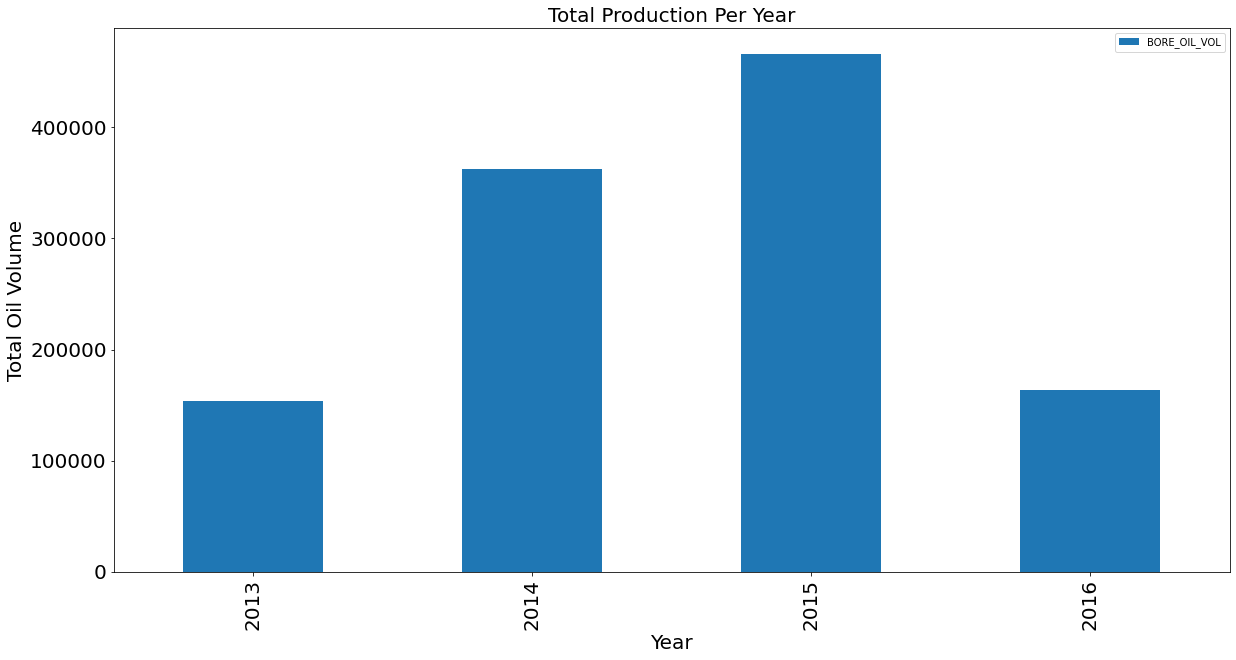

In [65]:
fig, ax = plt.subplots(figsize=(20,10))
# plot
df_well_drop_na[["BORE_OIL_VOL","Year"]].groupby(["Year"]).sum().plot(ax = ax, kind = "bar", fontsize = 20)
# y axis label
ax.set_ylabel("Total Oil Volume", fontsize = 20)
# x axis label
ax.set_xlabel("Year", fontsize = 20)
# title
ax.set_title("Total Production Per Year", fontsize = 20)
plt.show()

## Draw a line Plot of Oil and Production History on same axes

## Using box, plots what is the distribution of Pressure/Temperature by year ?

## After consulting with SME (onwer of the data), it was concluded that pressure readings below 200 and temperature readings below 65 are considered anomalies. <br>

## After filtering the data redo the previous question.